#### Define Imports

In [ ]:
#https://www.nps.gov/subjects/socialscience/visitor-use-statistics-dashboard.htm

In [7]:
import requests
import pandas as pd 
import random
import json
import sys

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0,'../')
from environment import env

#### Define Variables

In [5]:
config = env.env()

# input
nps_df = pd.read_csv(config['root']+'Chatbot_analysis\\NPS_visitations_2023.csv')
nps_df

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,1,"7,470",0,"7,470",...,0,"239,950",0,0,0,0,0,0,0,0
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,2,"8,750",0,"8,750",...,0,"239,950",0,0,0,0,0,0,0,0
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,3,"15,588",0,"15,588",...,0,"239,950",0,0,0,0,0,0,0,0
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,4,"24,682",0,"24,682",...,0,"239,950",0,0,0,0,0,0,0,0
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,5,"27,366",0,"27,366",...,0,"239,950",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,Zion NP,ZION,National Park,Intermountain,UT,2023,8,"458,449","1,860","3,027,979",...,"21,900","29,471,316","5,475","95,381",0,"100,411","85,948","8,497",0,"30,211"
4724,Zion NP,ZION,National Park,Intermountain,UT,2023,9,"491,799","1,800","3,063,140",...,"21,900","29,471,316","5,475","95,381",0,"100,411","85,948","8,497",0,"30,211"
4725,Zion NP,ZION,National Park,Intermountain,UT,2023,10,"504,584","1,860","3,149,423",...,"21,900","29,471,316","5,475","95,381",0,"100,411","85,948","8,497",0,"30,211"
4726,Zion NP,ZION,National Park,Intermountain,UT,2023,11,"284,978","1,800","1,896,028",...,"21,900","29,471,316","5,475","95,381",0,"100,411","85,948","8,497",0,"30,211"


#### Define Functions

In [11]:
df = nps_df[['Region','Month','RecreationVisits']]
df = df.groupby(['Region', 'Month']).sum().reset_index()
df

,Region,Month,RecreationVisits
0,Alaska,1,"002601,2461,6830223209601,24601,0441,454250"
1,Alaska,2,"001278722,662022320982273309321,120950"
2,Alaska,3,"002927515,4260273201261488208812,9762300"
3,Alaska,4,"002168915,71408,82622812,75399269917,9135200"
4,Alaska,5,"001721,03334,134275102,9827220,780192,6751,034..."
...,...,...,...
79,Southeast,8,"25,2863,9545,18798,33872,27241,8721,849,2523,1..."
80,Southeast,9,"26,3795,7454,28793,86682,08147,3062,054,7591,6..."
81,Southeast,10,"18,3667,0024,698111,32990,11732,7022,241,3091,..."
82,Southeast,11,"10,0187,0237,541152,38856,49527,2891,337,1732,..."


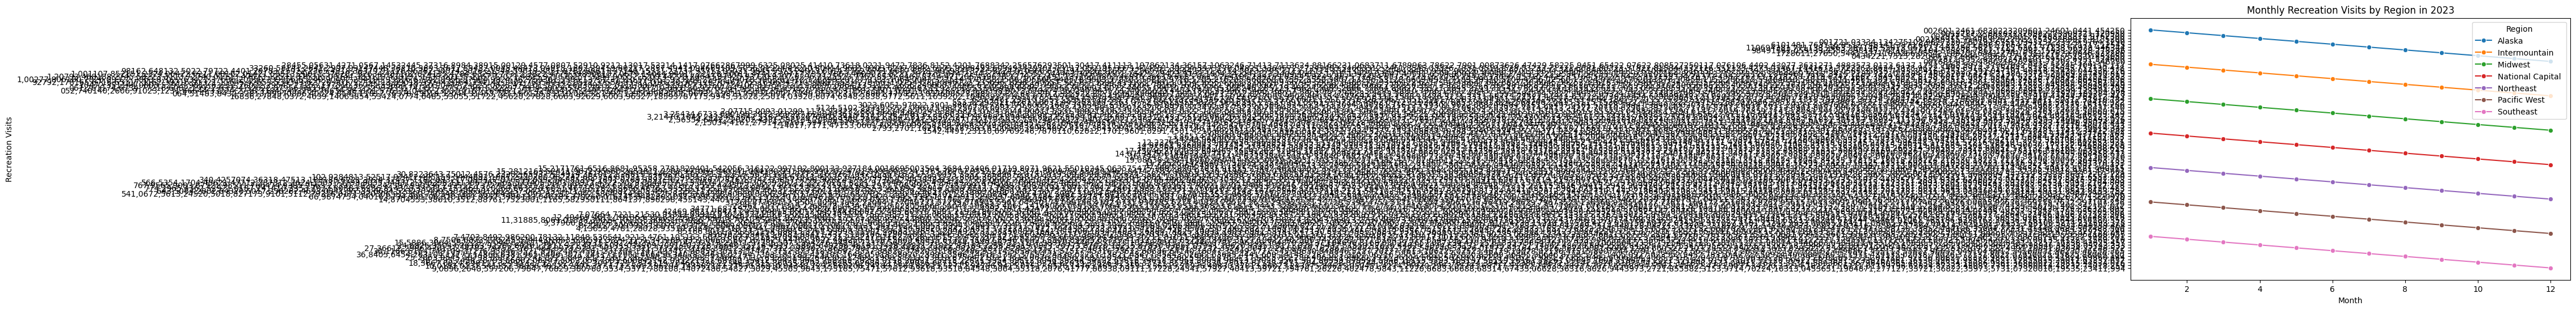

In [10]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='RecreationVisits', hue='Region', data=df, marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Recreation Visits')
plt.title('Monthly Recreation Visits by Region in 2023')

# Show the plot
plt.show()